In [1]:
import pandas as pd
from numpy import dtype
import numpy as np
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [2]:
dataset = pd.read_csv("/Users/boramert/Desktop/Code/bil570proje/archive/new_df_kucuk_v3.csv")

In [3]:
dataset.head()

,Unnamed: 0,index,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,242184,22,6,14/02/2018 02:38:46,377659,22,20,1928,2665,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
1,1,964331,53,17,14/02/2018 12:33:50,1138,1,1,45,115,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,2,203429,22,6,14/02/2018 02:06:35,8,1,1,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
3,3,189325,22,6,14/02/2018 02:11:20,379123,23,22,1928,2665,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
4,4,261223,22,6,14/02/2018 02:47:56,376212,22,20,1912,2665,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce


In [4]:
dataset['Timestamp'].head()

0    14/02/2018 02:38:46
1    14/02/2018 12:33:50
2    14/02/2018 02:06:35
3    14/02/2018 02:11:20
4    14/02/2018 02:47:56
Name: Timestamp, dtype: object

In [5]:
times = pd.to_datetime(dataset['Timestamp'], format = '%d/%m/%Y %H:%M:%S')

In [6]:
times.head()

0   2018-02-14 02:38:46
1   2018-02-14 12:33:50
2   2018-02-14 02:06:35
3   2018-02-14 02:11:20
4   2018-02-14 02:47:56
Name: Timestamp, dtype: datetime64[ns]

In [7]:
times.dt.second.head()

0    46
1    50
2    35
3    20
4    56
Name: Timestamp, dtype: int64

In [8]:
dataset['timestamp_year'] = times.dt.year
dataset['timestamp_month'] = times.dt.month
dataset['timestamp_day'] = times.dt.day
dataset['timestamp_hour'] = times.dt.hour
dataset['timestamp_minute'] = times.dt.minute
dataset['timestamp_second'] = times.dt.second

In [9]:
dataset.drop('Timestamp', axis = 1, inplace = True)

In [10]:
dataset.head()

,Unnamed: 0,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Idle Std,Idle Max,Idle Min,Label,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_minute,timestamp_second
0,0,242184,22,6,377659,22,20,1928,2665,640,...,0.0,0,0,SSH-Bruteforce,2018,2,14,2,38,46
1,1,964331,53,17,1138,1,1,45,115,45,...,0.0,0,0,Benign,2018,2,14,12,33,50
2,2,203429,22,6,8,1,1,0,0,0,...,0.0,0,0,SSH-Bruteforce,2018,2,14,2,6,35
3,3,189325,22,6,379123,23,22,1928,2665,640,...,0.0,0,0,SSH-Bruteforce,2018,2,14,2,11,20
4,4,261223,22,6,376212,22,20,1912,2665,640,...,0.0,0,0,SSH-Bruteforce,2018,2,14,2,47,56


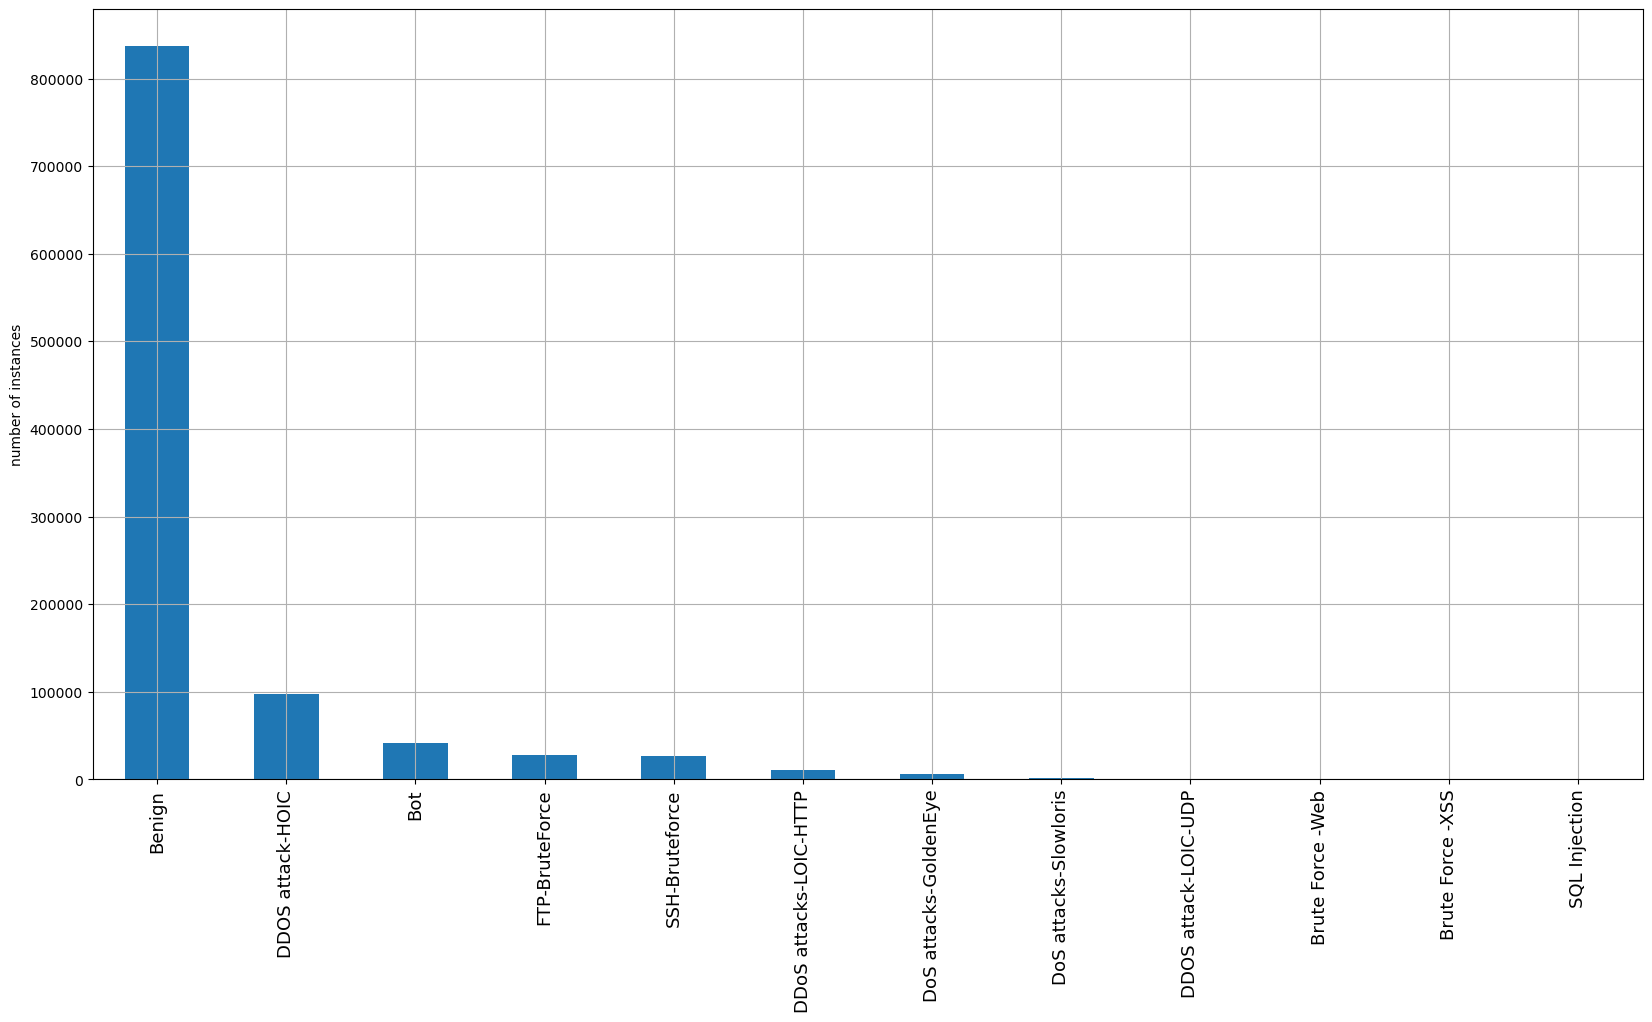

In [11]:
pd.value_counts(dataset['Label']).plot(kind='bar', figsize=(20, 10))
plt.ylabel('number of instances')
plt.xticks(fontsize=13)
plt.grid()
plt.show()

In [12]:
dataset.to_csv(r'/Users/boramert/Desktop/Code/bil570proje/archive/dataset_time.csv')